# Amazon Rainforest - data load test4  

Training worked!  **See S3a**  

| epoch  |train_loss  |valid_loss   |acc_multi  |fbeta_score  |  
|---     |---         |---          |---        |---          |  
|11	   |0.079361    |0.095701	  |0.959118   |0.923035	    |    

Model saved to gdrive planet_2k folder, and to geo-ml/tests/mytest_nbs/model folder.
Parameters saved.

Resnet34 model with reduced image number, 2000 train and 2000 labels.  

Model export did not work, pickling error.  Turn off %reload? 
Not needed until model is ready to deploy, use with new data files.

Next: try other models, improve source image quality, try with less categories (ones that will help predict deforestation). 


Markdown: paragraph 
TOC: 

## Data Load Test 4 (local)
env: fastai20 on conda3 WSL  
date: 8/4/2021 2pm start   
author: Jennifer Yoon  
desc: using fastai to load data.  
data: 2000 jpg images in train folder (256x256), 
fastai's PLANET_TINY has 200 images (126x126) 
original data source: Kaggle 2017 challenge, Planet Labs  
  About 40,700 images in train and test folder, in jpg 3 channel and tif with infrared 4th channel.

## Local Version  

### S0a. Setup for working locally  
Ubuntu WSL, conda env "fastai20"    
Python v 3.6, jupyter lab/nb, pytorch 1.7,   
nbdev 1.1, need nbdev for viewing fastai docs    

In [150]:
# import fastai libraries  
import nbdev

# import data science libaries into each alias namespace  
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import torch

%matplotlib inline  
%load_ext autoreload
%autoreload 2    
# auto-reload all external modules

np.random.seed(42)  # set seed for numpy.random 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# local version - test versions. 

!python --version  # v3.6.10 local
print("torch", torch.__version__)  # v1.1.11 local
print("nbdev", nbdev.__version__)  # v1,1,11 local

Python 3.6.10 :: Anaconda, Inc.
torch 1.7.1
nbdev 1.1.11


In [3]:
# name.<shift+tab>  # dot+shift+tab to view optioninfo.


In [4]:
# Load fastai library, book contents  
# install and import fastbook contents 
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [5]:
# import fastbook contents
from fastbook import *

# import all vision library namespace  
from fastai.vision.all import *


In [6]:
# dir() to see data science lib namespace
# doc(<fastai-class,function>) to see fastai documentation. Need nbdev.  

## Skip to S1a - planet_tiny or S1b - planet_2k, local version      

untar_data() downloads to Ubuntu, ``` ~/root/.fastai/data/<name> ```  
planet_2k is at c drive, google synced folder,   
``` C:\Users\jyoon\gdrive\Colab Notebooks\data\planet_2k ```

## Colab version  

### S0b. Setup for working in Colab  

 * mount gdrive  
 * run fastbook install codes, import fastbook, call setup  
 * from pathlib import Path (if "Path" object didn't get imported with fastbook import).  
 * somehow upload data folder to gdrive or to Colab instance \contents\gdrive\ path  
 * set Path object to point to uploaded data location, gdrive or root of Colab instance.  
 * test Path by showing one image file  

#### Mount google drive with Google Colab  
```
from google.colab import drive  
drive.mount('/content/drive')  
#drive.mount("/content/drive", force_remount=True)  
``` 

#### Set data path  
ex1 remote google drive:   
```Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k')```   
ex2 local:  
```Path('c:/users/jyoon/repos/data-big/planet-jpg')```  

#### Explore path  
```
!pwd        # print working directory. linux bash command  
!ls         # list items, linux bash command  
%cd <path>  # change working directory path
```

#### Path object from Python pathlib.py  
path = Path('/contents/gdrive/Colab Notebooks/data/planet-2k/train/')  
path.ls()  
path.BASE_PATH = path  
path.BASE_PATH  

In [11]:
"""
# Colab version
# check Python version
!python --version  # v3.7.11 Colab

import torch 
print(torch.__version__)  # v1.9.0  

# Colab nbdev not installed.  Not needed to run. 
""" ;

In [ ]:
# dir() to see data science lib namespace


In [4]:
"""
# Colab version

# Load fastai library, book contents  
# install and import fastbook contents 
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
""" ;

     |████████████████████████████████| 720 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 46.6 MB/s 
     |████████████████████████████████| 188 kB 48.0 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 304 kB/s 
Mounted at /content/gdrive


In [5]:
"""
# Colab version

# import fastbook contents
from fastbook import *

# import all vision library namespace  
from fastai.vision.all import *
""" ;

In [ ]:
#dir()  # prints all fastai vision imported namespace

### Set path - Colab version   
  
Copy planet_2k from Jennifer's Gdrive, upload manually to YOUR mounted gdrive.  
Lacation: ``` /content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/ ```  

untar_data() download to location: ``` /root/.fastai/data/<name> ```    

 < to add image >, google drive upload button. 

In [8]:
"""
# Colab version 
# set Path from pathlib.py to planet_2k folder. 

path = Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train')
path.ls()
""" ; 

(#2000) [Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1897.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1899.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1898.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1900.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_19.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1904.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1905.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1902.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_1903.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/data/planet_2k/train/train_191.jpg')...]

In [10]:
"""
# Colab version

# User relative address to shorten path  
Path.BASE_PATH = path  
Path.BASE_PATH  
""" ; 

Path('.')

In [ ]:
# Javascript keep alive widget, for working online with Google Colab

#%%javascript
#function ClickConnect(){
#    console.log(“Working”);
#    document.querySelector(“colab-connect-button”).shadowRoot.getElementById(‘connect’).click();
#}
#setInterval(ClickConnect,60000)

## Back to Local version  

### S1a. untar_data, PLANET_TINY  

Try using fastai's "untar_data" function to download PLANET_TINY data from fastai's aws.s3 server.

In [7]:
# download data PLANET_TINY from fastai's aws.s3 storage server.  
path2 = untar_data(URLs.PLANET_TINY)
path2.ls()

(#2) [Path('/home/jyoon/.fastai/data/planet_tiny/labels.csv'),Path('/home/jyoon/.fastai/data/planet_tiny/train')]

In [8]:
# shorten path
Path.BASE_PATH = path2
print(Path.BASE_PATH)
print(path2.ls())

/home/jyoon/.fastai/data/planet_tiny
[Path('labels.csv'), Path('train')]


In [9]:
filecsv = path2/'labels.csv'
print(filecsv)


/home/jyoon/.fastai/data/planet_tiny/labels.csv


In [10]:
df = pd.read_csv(filecsv)
df.head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [11]:
len(df)

200

In [12]:
# load one or more images.  
# do images show 
# import matplotlib.image as img 

In [13]:
files = get_image_files_sorted(path2/'train')
files[0], files[1], files[2]

(Path('train/train_10007.jpg'),
 Path('train/train_10030.jpg'),
 Path('train/train_10042.jpg'))

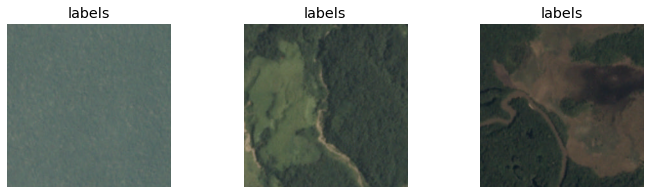

In [72]:
import matplotlib.image as img 

i = 0
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
for ax in axes.flat:  
    input = img.imread(files[i])
    ax.imshow(input)
    ax.set(title='labels')
    ax.axis('off')
    i += 1 
plt.show()



In [20]:
labels = []
for i in [0, 1, 2]:

    # loop through firest 3 rows, column 1 - labels
    label = df.iloc[i, 1]
    labels.append(label)

print(labels, type(labels))
print(labels[1])

['clear primary', 'partly_cloudy primary water', 'clear primary water'] <class 'list'>
partly_cloudy primary water


In [22]:
fs = []
for j in [0, 1, 2]: 
    
    # loop through first 3 rows, column 0 - file names, str.
    f = df.iloc[j, 0] + ".jpg"
    fs.append(f)

print(fs, type(fs))
print(fs[1])

['train_31112.jpg', 'train_4300.jpg', 'train_39539.jpg'] <class 'list'>
train_4300.jpg


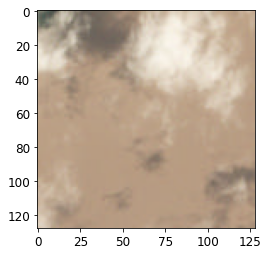

In [26]:
# read image file into memory, plt.show() to view.

img = plt.imread(path2/'train'/fs[1])
plt.imshow(img)


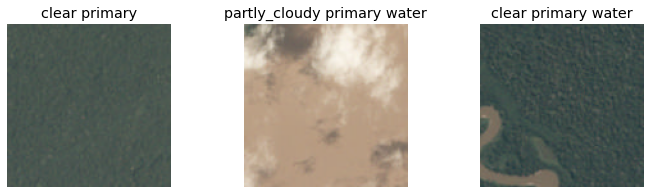

In [40]:
i = 0
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))  # row 1, col 3
# need separate i, axs.flat is a numpy iter object, but not a number.  
for ax in axs.flat:

    input = plt.imread(path2/'train'/fs[i])
    # print(input, type(input))   # class numpy ndarray
    ax.imshow(input)
    ax.set(title=labels[i])
    ax.axis('off')
    i += 1

plt.show()

## Local Version, planet_2k  

### S1b. Planet_2k data  
Working locally from Ubuntu fastai20 conda env.  
Data saved to "gdrive/Colab Notebooks/data/planet_2k" locally.  

In [73]:
# set path to planet-2k folder  
# C:\Users\jyoon\gdrive\Colab Notebooks\data\planet_2k
# location: Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')  

path2k = Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')
path2k.ls()

(#4) [Path('test'),Path('text_no_csv.txt'),Path('train'),Path('train_classes_2k.csv')]

In [74]:
Path.BASE_PATH = path2k
path2k.ls()

(#4) [Path('test'),Path('text_no_csv.txt'),Path('train'),Path('train_classes_2k.csv')]

In [75]:
csv2k = path2k/'train_classes_2k.csv'
print(csv2k)


/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k/train_classes_2k.csv


In [77]:
df2k = pd.read_csv(csv2k)
#df2k.tail()
df2k.head(12)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [ ]:
# explore labels data frame  
# df2k.describe() 
# df2k.tags.unique()
# len(df2k)
# dk2k['tags'] == 'na'

#### S2b. Explore Planet_2k images

In [78]:
# Set path again, define files
path2k = Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')
Path.BASE_PATH = path2k
path2k.ls()


(#4) [Path('test'),Path('text_no_csv.txt'),Path('train'),Path('train_classes_2k.csv')]

In [79]:
files = get_image_files(path2k/'train')

files[0], files[1], files[2], files[3], files[4] 

(Path('train/train_0.jpg'),
 Path('train/train_1.jpg'),
 Path('train/train_10.jpg'),
 Path('train/train_100.jpg'),
 Path('train/train_1000.jpg'))

train_0.jpg
label:  haze primary


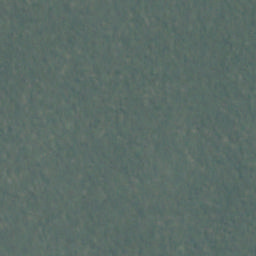

In [93]:
from PIL import Image
# We can open an image with the Python Imaging Library's Image class

# load image, open file
im0 = Image.open(files[0]).convert('RGB')
print(str(files[0])[-11:])
print("label: ", df2k.iloc[0, 1])

# show image
im0


train_1.jpg
label:  agriculture clear primary water


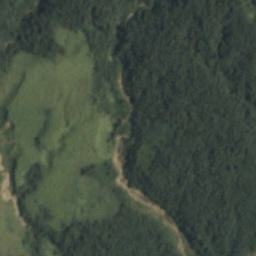

In [94]:
# Pillow only shows 1 image at a time.  Temporary display object.
im1 = Image.open(files[1]).convert('RGB')
print(str(files[1])[-11:])
print("label: ", df2k.iloc[1, 1])

im1

train_10.jpg
label:  agriculture clear primary slash_burn water


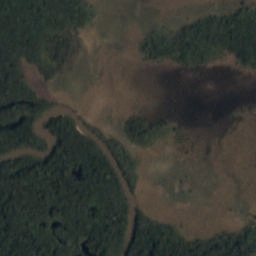

In [96]:
# Pillow only shows 1 image at a time.  Temporary display object.
im2 = Image.open(files[2]).convert('RGB')
print(str(files[2])[-12:])
print("label: ", df2k.iloc[10, 1])

im2


In [ ]:
# how to show 3 images at once?  Use matplotlib.pyplot?
# After images loaded into dls, can use "dls.show_batch(3)"

In [103]:
# Take filename and labels from dataframe  

# Reload path, dataframe if needed
path2k = Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')
Path.BASE_PATH = path2k
print(path2k.ls())

csv2k = path2k/'train_classes_2k.csv'
df2k = pd.read_csv(csv2k)

print(type(df2k))
df2k.head(12)


[Path('test'), Path('text_no_csv.txt'), Path('train'), Path('train_classes_2k.csv')]
<class 'pandas.core.frame.DataFrame'>


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [104]:
fs2k = []
for j in [0, 1, 2]: 
    
    # loop through first 3 rows, column 0 - file names, str.
    f = df2k.iloc[j, 0] + ".jpg"
    fs2k.append(f)

print(fs2k, type(fs2k))
print(fs2k[1])

labels2k = []
for i in [0, 1, 2]:

    # loop through first 3 rows, column 1 - labels
    label = df2k.iloc[i, 1]
    labels2k.append(label)

print(labels2k, type(labels2k))
print(labels2k[1])

['train_0.jpg', 'train_1.jpg', 'train_2.jpg'] <class 'list'>
train_1.jpg
['haze primary', 'agriculture clear primary water', 'clear primary'] <class 'list'>
agriculture clear primary water


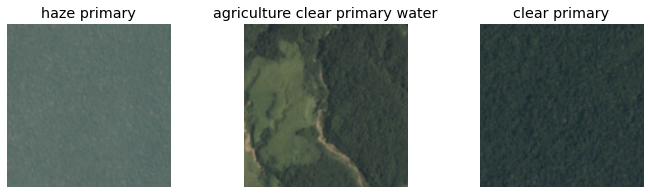

In [105]:
i = 0
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))  # row 1, col 3
# need separate i, axs.flat is a numpy iter object, but not a number.  
for ax in axs.flat:

    input = plt.imread(path2k/'train'/fs2k[i])
    # print(input, type(input))   # class numpy ndarray
    ax.imshow(input)
    ax.set(title=labels2k[i])
    ax.axis('off')
    i += 1

plt.show()

### Yeah!  That worked.  Next, load fastai DataBlock, DataLoaders

## Local version, load data block

### S3a. DataBlock, DataLoaders


      image_name                                       tags
0        train_0                               haze primary
1        train_1            agriculture clear primary water
2        train_2                              clear primary
3        train_3                              clear primary
4        train_4  agriculture clear habitation primary road
...          ...                                        ...
1995  train_1995                    habitation haze primary
1996  train_1996                                     cloudy
1997  train_1997                              clear primary
1998  train_1998                              clear primary
1999  train_1999                              clear primary

[2000 rows x 2 columns]


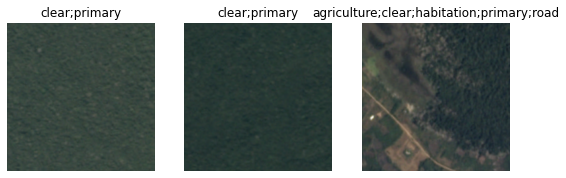

In [148]:
# Copied from "0-93-multi-category-planet-dataset...ipynb"
# path = Path('../input/planets-dataset/planet/planet')
# change path to my planet_2k folder.  
path2k = Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')

# train_df = pd.read_csv(path/'train_classes.csv')
# change df path 
train_df = pd.read_csv(path2k/'train_classes_2k.csv')
print(train_df)

def get_x(r):
    return path2k/'train'/(r['image_name']+'.jpg')

def get_y(r):
    return r['tags'].split()

def get_data(size=224,bs=64,data_df=train_df):
    dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                       splitter=RandomSplitter(seed=42),
                       get_x=get_x, 
                       get_y=get_y,
                       item_tfms = Resize(size),
                       # added batch_tfms params  
                       batch_tfms = [*aug_transforms(flip_vert=True, max_lighting=0.2, max_zoom=1.1, max_warp=0),
                                     Normalize.from_stats(*imagenet_stats)]
                      ) 
    
    return dblock.dataloaders(data_df,bs=bs)

# dls = get_data(300,40)  # I don't know what (300, 40) specifies
# randomly shows different images in show_batch, regardless of no parm, or param
# Maybe it's (size= , batchsize= ), defaults to 224, 64, in def get_data block.  

dls = get_data(224, 64)
dls.show_batch(nrows=1, ncols=3)

### S4a, Training  

Still using copied code from "0-93-multi-category-planet-dataset...ipynb"

epoch,train_loss,valid_loss,accuracy_multi,fbeta_score,time
0,0.843352,0.515343,0.385294,0.524664,06:36
1,0.522628,0.160376,0.945000,0.868457,06:50
2,0.347724,0.144912,0.944265,0.868681,06:37
3,0.271626,0.140859,0.941176,0.881618,06:31


epoch,train_loss,valid_loss,accuracy_multi,fbeta_score,time
0,0.164079,0.177660,0.915294,0.835097,08:32
1,0.148784,0.159059,0.942353,0.864966,08:17
2,0.142413,0.378271,0.901029,0.733994,08:26
3,0.137951,0.146703,0.917647,0.870453,08:23
4,0.134361,0.116897,0.948676,0.897872,08:28
5,0.131271,0.137398,0.940588,0.898257,08:00
6,0.121563,0.107006,0.953971,0.909874,08:07
7,0.109613,0.102417,0.953824,0.912022,08:10
8,0.101103,0.098154,0.955147,0.914845,08:06
9,0.092173,0.096653,0.960147,0.918859,08:15


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=7.585775892948732e-05)

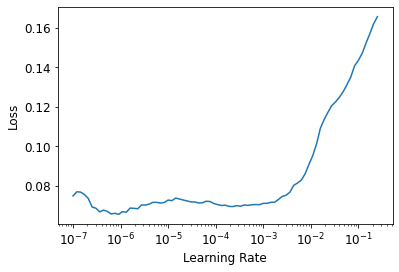

In [127]:
# Main parts that can be copied, usable.  
# metrics was provided on Kaggle. Check calculation.

f2samples = FBetaMulti(beta=2,average='samples',thresh=0.2)
metrics = [partial(accuracy_multi, thresh=0.2), f2samples]

learn = cnn_learner(dls, resnet34, metrics=metrics)
learn.fine_tune(12, base_lr=3e-2, freeze_epochs=4)
learn.lr_find()

### Working, Model is Training resnet34.  
Working on my local computer, taking a long time.  
Next, re-run on Google Colab.  
But before that, try other model specifications.  

In [141]:
# export and save model.  Took ~2.7 hr.  2:10 am stopped training.

# And save the whole model to stage-1.  
learn.save('p2k-stage-1-rn34')

Path('models/p2k-stage-1-rn34.pth')

In [135]:
# save one mode copy  
learn.save(path2k/'p2k-cpu-rn34')

Path('p2k-cpu-rn34.pth')

In [149]:
# Final model export  
# Export is only designed for when you’re all done and ready to deploy (or atleast at a point where you don’t need your training data)
# learn.export('p2k-cpu-rn34.pth')
# can't export. pickling error get_x is not the same as __main__get_x.  

PicklingError: Can't pickle <function get_x at 0x7f41c848b950>: it's not the same object as __main__.get_x

In [126]:
# Still using copied code from "0-93-multi-category-planet-dataset...ipynb"
# Looks like the guy tried out several different pre-trained models. Download from Pytorch.pth binary file. 
# Rest of this code is not useful. JY  

# cbs = [MixUp]
# learn = Learner(dls, model, metrics=metrics, f2samples], cbs=cbs)
# learn = Learner(dls, model, metrics=metrics, loss_func=LabelSmoothingCrossEntropy(), cbs=cbs)

# Download model efficientnet_b3
# learn = timm_learner(dls, 'efficientnet_b3', metrics=metrics, cbs=cbs)  
# model = EfficientNet.from_pretrained('efficientnet-b7', get_c(dls))
# > Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_ra2-cf984f9c.pth


### S5a, Training, fastai-lesson3-2018  

Copied from "fast-vi-v3-lesson-3-planet.ipynb." This was 2018 course lesson 3.  

```
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(sep=' '))
       
data = (src.transform(tfms, size=128)
        .databunch(num_workers=0).normalize(imagenet_stats))
        # Image size start at 128 pixels, half size.  
        
data.show_batch(rows=3, figsize=(12,9))
```

To create a `Learner` we use the same function as in lesson 1. Our base architecture is resnet34 again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of `accuracy`. In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.

As for Fbeta, it's the metric that was used by Kaggle on this competition. See [here](https://en.wikipedia.org/wiki/F1_score) for more details (https://en.wikipedia.org/wiki/F1_score).

```
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

#Baseline model, resnet50, image size start at 128 pixels. 
arch = models.resnet50

# Run learner
learn = create_cnn(data, arch, metrics=[acc_02, f_score], model_dir='/tmp/models')
``` ;


In [ ]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(sep=' '))
       
data = (src.transform(tfms, size=128)
        .databunch(num_workers=0).normalize(imagenet_stats))
        
data.show_batch(rows=3, figsize=(12,9))

In [ ]:
# metrics provided by Kaggle, acc_02 and f_score  
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

arch = models.resnet50

# Run training, metrics, resnet50
# Need to set "model_dir"?
learn = create_cnn(data, arch, metrics=[acc_02, f_score], model_dir='/tmp/models')

### S6a, Fine Tune, save trained model, reload and more fine tune  

Lesson 3, progressively fune-tunes, freeze and save/export trained model, then re-load to train some more.  

```
# We use the LR Finder to pick a good learning rate.
learn.lr_find()
learn.recorder.plot()

# Then we can fit the head of our network.
lr = 0.01
learn.fit_one_cycle(5, slice(lr))

# And save the whole model to stage-1.  
learn.save('stage-1-rn50')

#...And fine-tune the whole model  
learn.unfreeze()

# update learning-rate finder
learn.lr_find()
learn.recorder.plot()

# update fit and save stage-2.
learn.fit_one_cycle(5, slice(1e-5, lr/5))
learn.save('stage-2-rn50')
```

#### Next, incread image size to 256 pixels, train two more time.  

Lesson 3 continuedm training.  

```
data = (src.transform(tfms, size=256)
        .databunch(num_workers=0).normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape
learn.freeze()  # why is freeze here?

learn.lr_find()
learn.recorder.plot()

lr=1e-2/2
learn.fit_one_cycle(5, slice(lr))
learn.save('stage-1-256-rn50')

learn.unfreeze()  # why unfreeze? fine_tuning all layers?  
learn.fit_one_cycle(5, slice(1e-5, lr/5))
learn.recorder.plot_losses()
learn.save('stage-2-256-rn50')

# Final model export  
learn.export()

```

You won't really know how you're going until you submit to Kaggle, since the leaderboard isn't using the same subset as we have for training. But as a guide, 50th place (out of 938 teams) on the private leaderboard was a score of `0.930`.  

Private Leaderboard score: 0.9296 (around 80th) -- this notebook.   

Rest of file shows how to submit to Kaggle.  
Create test.csv file with predicted labels.


## Local Version, Train, 2020 chp 6  

### S7a - Train, use fastai 2020 chp 6, mutli-category nb. 


In [ ]:
# Set path again 
# Reset plant_2k folder, if needed
# path2k = Path('/mnt/c/users/jyoon/gdrive/Colab Notebooks/data/planet_2k')
path = path2k
print("current path:", path)

# read in dataframe
# Reset csv path if needed 
# train_df = pd.read_csv(path2k/'train_classes_2k.csv')
df = train_df 

print(path, df)

In [ ]:
# Create a blank DataBlock, class instance.  
dblock = DataBlock()
print(dblock, type(dblock))

In [ ]:
# Next, create datasets with dataframe source
dsets = dblock.datasets(df)
print(dsets, type(dsets)

# dsets has train and validation sets 
print(len(dsets.train), len(dsets.valid))
      
# print one data point  
x, y = dsets.train[0]  
print("x:", x, "x filename:", x['fname'])

In [ ]:
# define get_x and get_y.  r is df input. 
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

In [142]:

"""
# define without lambda function.  
# r is df input.  

def get_x(r): return r['fname']
def get_y(r): return r['labels']
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)  # df is passed to get_x and get_y as "r". 
dsets.train[0]
""" ;

In [ ]:
# with full path, open image object. 

def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

In [ ]:
# populate DataBlock. model uses ImageBlock and MultiCategoryBlock.  
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

In [ ]:
# look inside pytorch with index.  
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

In [ ]:
# add split into training set and validation set 
def splitter(df):
    train = df.index[~df['is_valid']].tolist()  # not validation set
    valid = df.index[df['is_valid']].tolist()   # validation set 
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y)

dsets = dblock.datasets(df)
dsets.train[0]

In [ ]:
# resize images to same size.  start small at 128 pixels.

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

In [ ]:
# show images, with correct labels    
dls.show_batch(nrows=2, ncols=3)

# use summary method to debug  
dls.summary()

#### Train, select model, resnet18 start

In [ ]:
# Create cnn learner 
learn = cnn_learner(dls, resnet18)

# download pytorch pre-trained model  
# > Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth

In [ ]:
x,y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
print(activs.shape)
# > torch.Size([64, 20])
# activation: 64 batch, 20 categories  

print(activs[0])